# Assignment 3
Author: Nicodemus Ong
Student ID: 22607943

## 1. Dataset:

We will use a modified version of the California housing dataset, which contains data from the 1990 California census and includes information about housing prices and various factors affecting housing values across different districts in California. The dataset comprises features such as median income, housing median age, etc., and the target variable is the median house value for California districts. The dataset unit (that is, each row in the dataset) corresponds to a district. A district represents the smallest geographical unit for which the U.S. Census Bureau publishes sample data. Typically, a district contains a population ranging from 600 to 3,000 individuals.

The variables of the dataset are:

- longitude: district group longitude.

- latitude: district group latitude.

- housingMedianAge: median house age in the district.

- totalRooms: the total number of rooms in the district.

- totalBedrooms: the total number of bedrooms in the district

- population: district population.

- households: the total number of households in the district.

- medianIncome: median income in the district.

- oceanProximity: whether each district is near the ocean, near the Bay area, inland or on an island (categorical).

- medianHouseValue: the median house value (target variable).

**In all asked implementations, you should set random state=5508 when necessary for results reproducibility.**

## 2 Tasks:
Reading the dataset:

Read the dataset using the provided file in LMS: housingCalifornia.csv. The dataset has 20,640 rows and 10 columns (eight numeric variable, one categorical variable and one target variable).


### D1: 
Exploratory data analysis and preprocessing.

1. Plot the histograms of the non-categorical features and the target in a grid subplot using the histplot function from the seaborn with the default values.

2. Compute the correlation matrix of all features (including the target features). Do not use the categorical variable (ocean proximity). Describe which features are more correlated (correlation coefficient higher than 0.8 in magnitude) and why you think this is the case.

3. Present a scatter plot for each variable, displaying the corresponding variable on the x-axis and the target variable on the y-axis.

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [82]:
df = pd.read_csv('housingCalifornia.csv')

In [83]:
df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


In [84]:
# Filtering non-categorical features and the target
numeric_features = df.select_dtypes(include=['float64', 'int64'])

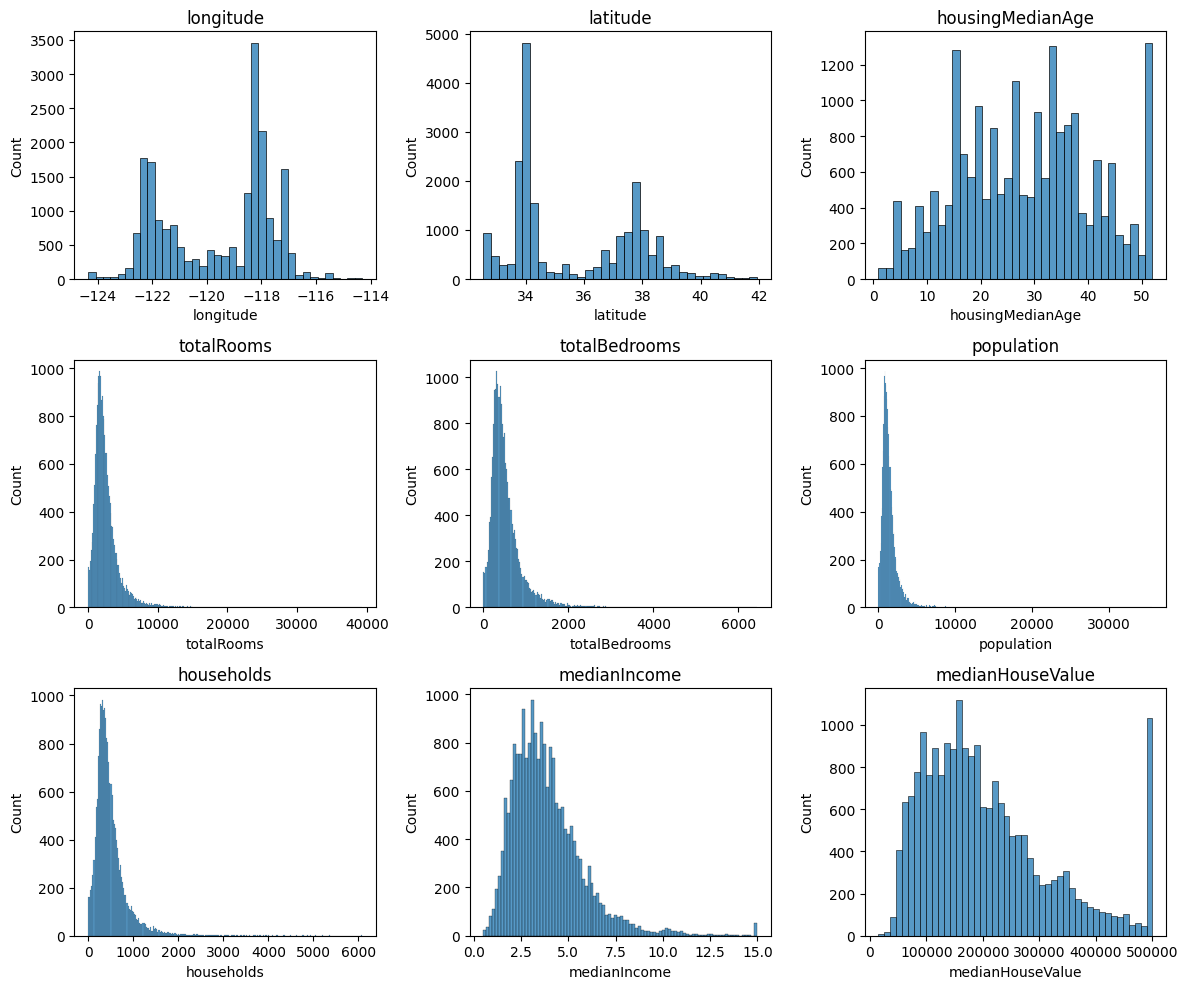

In [85]:
# Plotting histograms
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size appropriately for the number of features
    sns.histplot(numeric_features[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [86]:
numeric_features_corr = numeric_features.corr()

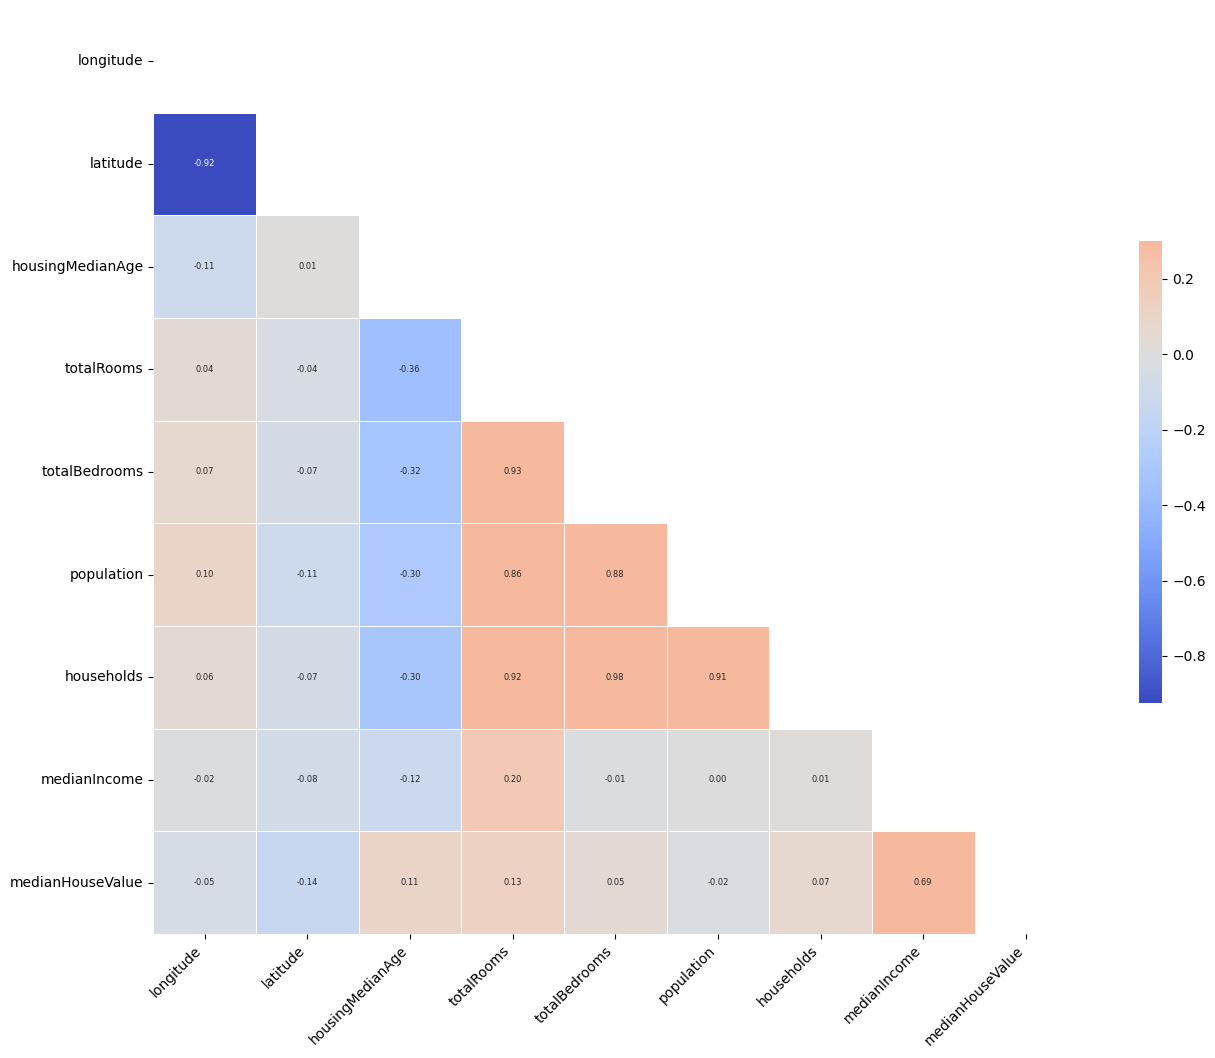

In [87]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(16, 12))

# Generate a mask for the upper triangle of the correlation matrix
# This mask will be used to hide the upper triangle, as the matrix is symmetrical
mask = np.triu(np.ones_like(numeric_features_corr, dtype=bool))

# Create the heatmap using seaborn
# 'mask' hides the upper triangle of the matrix, 'cmap' sets the color palette
# 'vmax' controls the maximum correlation value for color scaling, 'center' sets the center of the colormap at zero
# 'square' ensures each cell is square-shaped, 'linewidths' sets the width of the lines that will divide each cell
# 'cbar_kws' adjusts the size of the color bar, 'annot' enables annotations inside the squares
# 'fmt' specifies the string formatting for annotations, 'annot_kws' adjusts the size of the annotations
sns.heatmap(numeric_features_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 6})

# Rotate the labels on the x-axis to 45 degrees for better readability
# 'ha' sets the horizontal alignment of the labels
plt.xticks(rotation=45, ha='right')

# Display the heatmap
plt.show()

#### Answer:
D1 (2)

The features with the highest correlations are totalRooms, totalBedrooms, and households, reflecting the inherent relationships between these measures of housing characteristics. 

1. TotalRooms and TotalBedrooms:

    * Correlation Coefficient: 0.93
    * Explanation: The high correlation between totalRooms and totalBedrooms is expected because both features measure related aspects of housing in each district. More rooms generally imply more bedrooms, leading to a strong positive correlation.

2. Households and TotalBedrooms:

    * Correlation Coefficient: 0.87
    * Explanation: This high correlation indicates that the number of households in a district is closely related to the number of bedrooms. This makes sense because more households usually require more bedrooms, resulting in a strong positive correlation.

3. Households and TotalRooms:

    * Correlation Coefficient: 0.92
    * Explanation: Similar to the relationship between total bedrooms and total rooms, the number of households correlates strongly with the total number of rooms. More households would typically require more rooms to accommodate them, leading to a strong positive correlation.

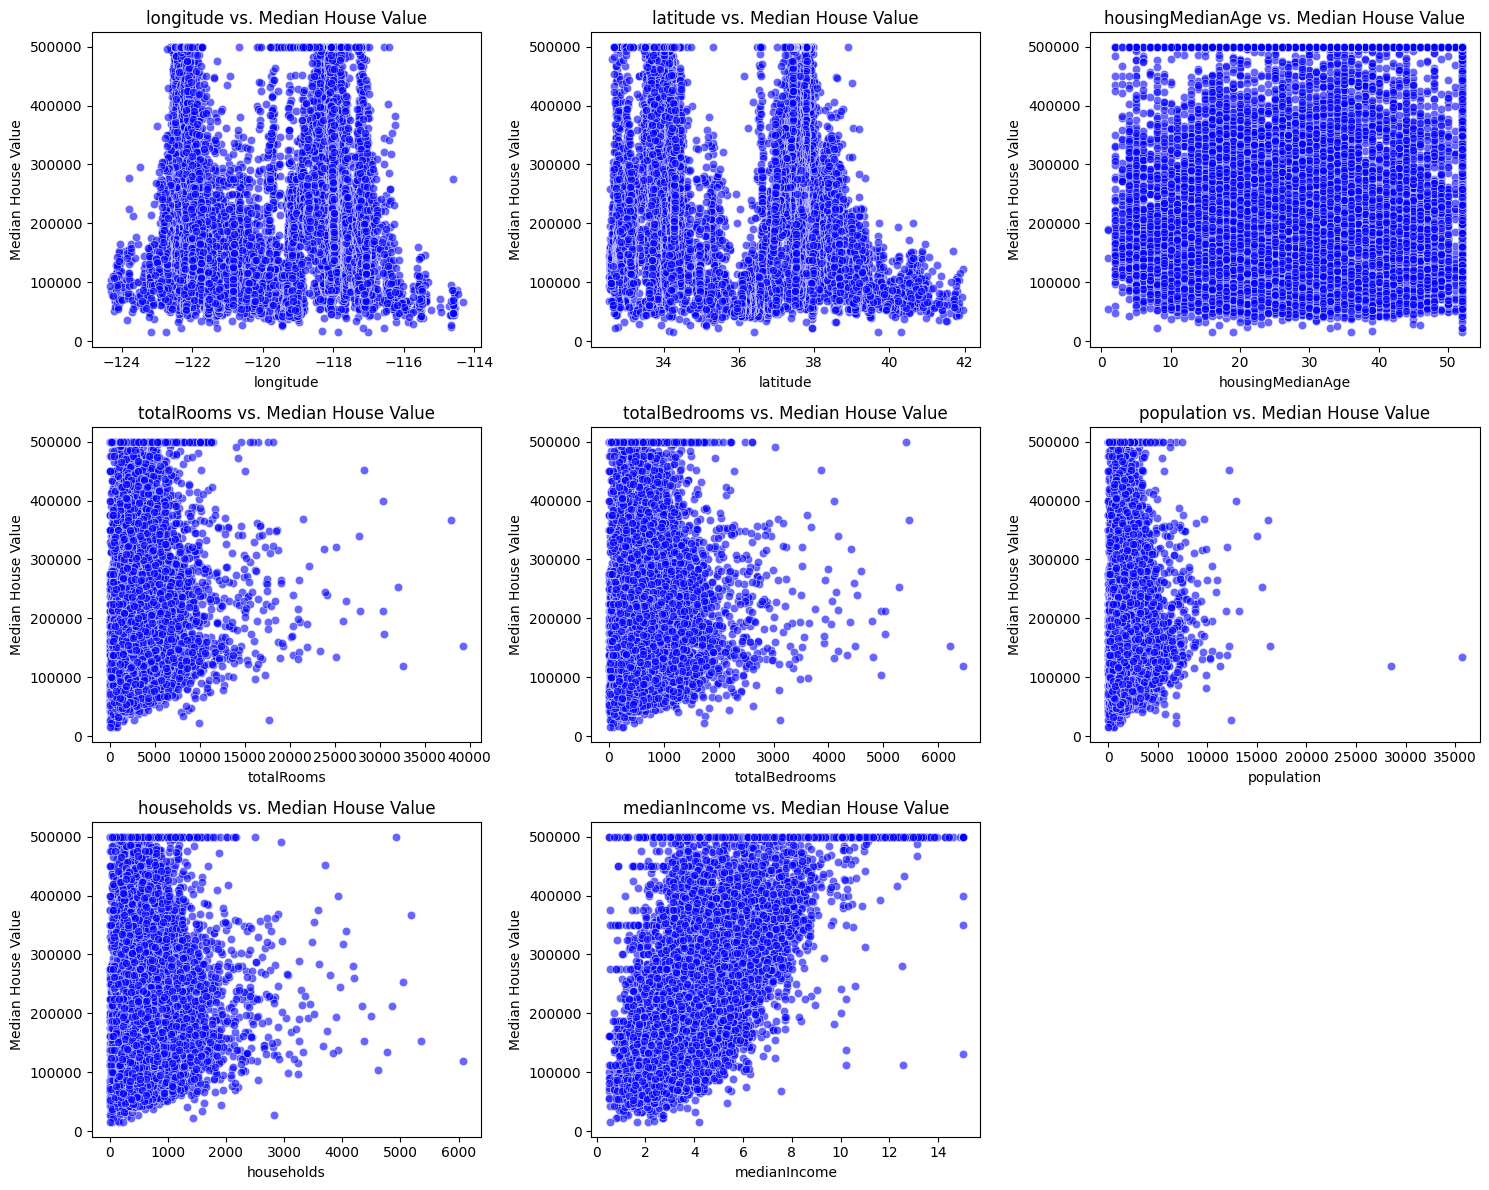

In [88]:
# Creating scatter plots for all numeric features against the target variable 'medianHouseValue'
plt.figure(figsize=(15, 12))

# List of all numeric columns except the target
features = [col for col in numeric_features.columns if col != 'medianHouseValue']

# Plotting each feature against the target
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Adjust the grid size if necessary
    sns.scatterplot(x=df[feature], y=df['medianHouseValue'], color='blue', alpha=0.6)
    plt.title(f'{feature} vs. Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

Analysing the impact of different data transformations. Create two versions of the dataset as described below. Remember to properly encode the categorical variable by creating l − 1 new binary/dummy variables, where l is the number of categories of the variable. Use “<1H OCEAN” as a reference (you should not add a dummy variable for this category).

- The original dataset (that is, with the new dummy variables, removing the categorical variable, and without any other changing the features). We will refer to this version as data1.

- The dataset with the transformation in the target variable: change the unit of the target variable to hundreds of thousands of dollars. For example, if the median house value of a district was 452600.0 before, in this dataset, it will be 4.526. Thus, you will keep all the original predictor variables (same features as data1) and update the target variable. This version will be referred to as data2.

### D2:

Split each of these two datasets into training and test sets, using 80% of the data for training (use the Python train test split function). Remember to set the random generator’s state to the value “5508” for the splitting function. Fit two models in each dataset: a linear regression model and a Lasso regression model with α = 100. Standardised both datasets appropriately (transforming the features to have zero mean and unit standard deviation). Thus, you provide results for the original and standardised version of data1) and for the original and standardised version of data2).

1. In a table, report the RMSE for the training and test sets for the two models for each dataset. That is, your table should contain four rows with four values each.

2. Discuss the RMSE values obtained results. Specifically, discuss if they have the same values and why and if they have different values and why.

In [89]:
# Creating dummy variables for the categorical feature 'oceanProximity', using "<1H OCEAN" as the reference category
dummies = pd.get_dummies(df['oceanProximity'], drop_first=True)

# Concatenate the dummy variables with the original dataframe and drop the 'oceanProximity' column
data1 = pd.concat([df.drop('oceanProximity', axis=1), dummies], axis=1)

data1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,True,False,False,False


In [90]:
# Creating data2 by transforming the 'medianHouseValue' to hundreds of thousands
data2 = data1.copy()
data2['medianHouseValue'] = data2['medianHouseValue'] / 100000

data2

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,4.526,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3.585,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,3.521,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,3.413,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,3.422,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0.781,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,0.771,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0.923,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0.847,True,False,False,False


In [91]:
# Data1
y1 = data1['medianHouseValue']
X1 = data1.drop('medianHouseValue', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=5508)

# Data2
y2 = data2['medianHouseValue']
X2 = data2.drop('medianHouseValue', axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=5508)

In [92]:
scaler = StandardScaler()
# Data1
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

# Data2
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [93]:
# Fit Linear Regression model on original data1
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
y1_pred_train = lr1.predict(X1_train)
y1_pred_test = lr1.predict(X1_test)
data1_linear_train_rmse = np.sqrt(mean_squared_error(y1_train, y1_pred_train))
data1_linear_test_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_test))
data1_linear_coeffs = lr1.coef_

# Fit Lasso Regression model on original data1
lasso1 = Lasso(alpha=100, random_state=5508)
lasso1.fit(X1_train, y1_train)
y1_pred_train_lasso = lasso1.predict(X1_train)
y1_pred_test_lasso = lasso1.predict(X1_test)
data1_lasso_train_rmse = np.sqrt(mean_squared_error(y1_train, y1_pred_train_lasso))
data1_lasso_test_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_test_lasso))
data1_lasso_coeffs = lasso1.coef_

In [94]:
# Fit Linear Regression model on standardized data1
lr1_scaled = LinearRegression()
lr1_scaled.fit(X1_train_scaled, y1_train)
y1_pred_train_scaled = lr1_scaled.predict(X1_train_scaled)
y1_pred_test_scaled = lr1_scaled.predict(X1_test_scaled)
data1_scaled_linear_train_rmse = np.sqrt(mean_squared_error(y1_train, y1_pred_train_scaled))
data1_scaled_linear_test_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_test_scaled))
data1_scaled_linear_coeffs = lr1_scaled.coef_

# Fit Lasso Regression model on standardized data1
lasso1_scaled = Lasso(alpha=100, random_state=5508)
lasso1_scaled.fit(X1_train_scaled, y1_train)
y1_pred_train_lasso_scaled = lasso1_scaled.predict(X1_train_scaled)
y1_pred_test_lasso_scaled = lasso1_scaled.predict(X1_test_scaled)
data1_scaled_lasso_train_rmse = np.sqrt(mean_squared_error(y1_train, y1_pred_train_lasso_scaled))
data1_scaled_lasso_test_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_test_lasso_scaled))
data1_scaled_lasso_coeffs = lasso1_scaled.coef_


In [95]:
# Fit Linear Regression model on original data2
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y2_pred_train = lr2.predict(X2_train)
y2_pred_test = lr2.predict(X2_test)
data2_linear_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_pred_train))
data2_linear_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
data2_linear_coeffs = lr2.coef_

# Fit Lasso Regression model on original data2
lasso2 = Lasso(alpha=100, random_state=5508)
lasso2.fit(X2_train, y2_train)
y2_pred_train_lasso = lasso2.predict(X2_train)
y2_pred_test_lasso = lasso2.predict(X2_test)
data2_lasso_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_pred_train_lasso))
data2_lasso_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_test_lasso))
data2_lasso_coeffs = lasso2.coef_

In [96]:
# Fit Linear Regression model on standardized data2
lr2_scaled = LinearRegression()
lr2_scaled.fit(X2_train_scaled, y2_train)
y2_pred_train_scaled = lr2_scaled.predict(X2_train_scaled)
y2_pred_test_scaled = lr2_scaled.predict(X2_test_scaled)
data2_scaled_linear_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_pred_train_scaled))
data2_scaled_linear_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_test_scaled))
data2_scaled_linear_coeffs = lr2_scaled.coef_

# Fit Lasso Regression model on standardized data2
lasso2_scaled = Lasso(alpha=100, random_state=5508)
lasso2_scaled.fit(X2_train_scaled, y2_train)
y2_pred_train_lasso_scaled = lasso2_scaled.predict(X2_train_scaled)
y2_pred_test_lasso_scaled = lasso2_scaled.predict(X2_test_scaled)
data2_scaled_lasso_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_pred_train_lasso_scaled))
data2_scaled_lasso_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_test_lasso_scaled))
data2_scaled_lasso_coeffs = lasso2_scaled.coef_

#### Answer:
D2 (1)

In [97]:
# Generate table
rmse_results = {
    'Data1': {
        'Linear train RMSE': data1_linear_train_rmse,
        'Linear test RMSE': data1_linear_test_rmse,
        'Lasso train RMSE': data1_lasso_train_rmse,
        'Lasso test RMSE': data1_lasso_train_rmse,
    },
    'Data1 Scaled': {
        'Linear train RMSE': data1_scaled_linear_train_rmse,
        'Linear test RMSE': data1_scaled_linear_test_rmse,
        'Lasso train RMSE': data1_scaled_lasso_train_rmse,
        'Lasso test RMSE': data1_scaled_lasso_train_rmse,
    },
    'Data2': {
        'Linear train RMSE': data2_linear_train_rmse,
        'Linear test RMSE': data2_linear_test_rmse,
        'Lasso train RMSE': data2_lasso_train_rmse,
        'Lasso test RMSE': data2_lasso_train_rmse,
    },
        'Data2 Scaled': {
        'Linear train RMSE': data2_scaled_linear_train_rmse,
        'Linear test RMSE': data2_scaled_linear_test_rmse,
        'Lasso train RMSE': data2_scaled_lasso_train_rmse,
        'Lasso test RMSE': data2_scaled_lasso_train_rmse,
    }
}

rmse_results_df = pd.DataFrame.from_dict(rmse_results, orient='index')

display(rmse_results_df)

,Linear train RMSE,Linear test RMSE,Lasso train RMSE,Lasso test RMSE
Data1,68607.314131,68589.312340,68660.504643,68660.504643
Data1 Scaled,68607.314131,68500.252261,68615.441095,68615.441095
Data2,0.686073,0.685893,1.129396,1.129396
Data2 Scaled,0.686073,0.685003,1.156303,1.156303


#### Answer:
D2 (2)

* The RMSE values for the linear regression model on the original data and the scaled data are very close to each other, indicating that scaling the features did not significantly impact the performance of the linear regression model. This suggests that the linear regression model is relatively robust to the scale of the features.

* The Lasso regression model also shows very similar RMSE values for both the original and scaled datasets. However, the Lasso model performed slightly worse than the linear regression model on the original data, with the same RMSE for both train and test sets, suggesting that the Lasso model might be underfitting. Scaling the features slightly improved the RMSE but not significantly, indicating that the impact of scaling is minimal for the Lasso model as well.

* For the dataset with the transformed target variable (scaled to hundreds of thousands of dollars), the linear regression model again shows very close RMSE values for both the original and scaled data. This consistency further supports the robustness of the linear regression model to feature scaling. 

* The Lasso regression model shows higher RMSE values compared to the linear regression model for the transformed target variable dataset, indicating worse performance. This is consistent for both the original and scaled versions of the dataset. The slightly higher RMSE for the scaled data suggests that scaling might have introduced some instability to the Lasso model, potentially due to its sensitivity to the regularization parameter (α = 100).

### D3:

Create three new features (meanRooms, meanBedrooms, and meanOccupation) as follows:

* meanRooms = total rooms / households.Itrepresentsthemeannumberofroomsperhouse- hold.

* meanBedrooms = total bedrooms / households. It represents the mean number of bed- rooms per household.

* meanOcupation = population / households. It represents the mean number of household members.

Create a new dataset (data3) by deleting the features total rooms, total bedrooms, households and population and by adding these new three features. The target variable should be as in data2, that is, expressed in hundreds of thousands of dollars. Split data3 into training and test sets, using 80% of the data for training and setting the random generator’s state to the value “5508” for the splitting function. Fit a linear regression model and a Lasso regression model with α = 100 to the data with the proper feature standardisation and without standardisation.

1. Report the RMSE for the two models’ training and test sets in a table. Your table should contain two rows with four values each.

2. Discuss and justify the obtained values of RMSE.

3. Report the estimated parameter values with the corresponding variable names for all mod- els (12 in total, eight from D2 and four from D3).

4. Discuss the obtained results. Are there similarities with the parameters’ values from each model? Justify your answer.

In [98]:
data3 = data2.copy()
data3['meanRooms'] = data3['totalRooms'] / data3['households']
data3['meanBedrooms'] = data3['totalBedrooms'] / data3['households']
data3['meanOcupation'] = data3['population'] / data3['households']

data3 = data3.drop(['totalRooms', 'totalBedrooms', 'households', 'population'], axis=1)

data3

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,meanRooms,meanBedrooms,meanOcupation
0,-122.23,37.88,41,8.3252,4.526,False,False,True,False,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,False,False,True,False,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,False,False,True,False,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,False,False,True,False,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,False,False,True,False,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,True,False,False,False,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,True,False,False,False,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,True,False,False,False,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,True,False,False,False,5.329513,1.171920,2.123209


In [99]:
# Data3
y3 = data3['medianHouseValue']
X3 = data3.drop('medianHouseValue', axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=5508)

# Data3 Scaled
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.fit_transform(X3_test)

In [100]:
# Fit Linear Regression model on original data3
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
y3_pred_train = lr3.predict(X3_train)
y3_pred_test = lr3.predict(X3_test)
data3_linear_train_rmse = np.sqrt(mean_squared_error(y3_train, y3_pred_train))
data3_linear_test_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_test))
data3_linear_coeffs = lr3.coef_

# Fit Lasso Regression model on original data3
lasso3 = Lasso(alpha=100, random_state=5508)
lasso3.fit(X3_train, y3_train)
y3_pred_train_lasso = lasso3.predict(X3_train)
y3_pred_test_lasso = lasso3.predict(X3_test)
data3_lasso_train_rmse = np.sqrt(mean_squared_error(y3_train, y3_pred_train_lasso))
data3_lasso_test_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_test_lasso))
data3_lasso_coeffs = lasso3.coef_

In [101]:
# Fit Linear Regression model on standardized data3
lr3_scaled = LinearRegression()
lr3_scaled.fit(X3_train_scaled, y3_train)
y3_pred_train_scaled = lr3_scaled.predict(X3_train_scaled)
y3_pred_test_scaled = lr3_scaled.predict(X3_test_scaled)
data3_scaled_linear_train_rmse = np.sqrt(mean_squared_error(y3_train, y3_pred_train_scaled))
data3_scaled_linear_test_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_test_scaled))
data3_scaled_linear_coeffs = lr3_scaled.coef_

# Fit Lasso Regression model on standardized data3
lasso3_scaled = Lasso(alpha=100, random_state=5508)
lasso3_scaled.fit(X3_train_scaled, y3_train)
y3_pred_train_lasso_scaled = lasso3_scaled.predict(X3_train_scaled)
y3_pred_test_lasso_scaled = lasso3_scaled.predict(X3_test_scaled)
data3_scaled_lasso_train_rmse = np.sqrt(mean_squared_error(y3_train, y3_pred_train_lasso_scaled))
data3_scaled_lasso_test_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_test_lasso_scaled))
data3_scaled_lasso_coeffs = lasso3_scaled.coef_

In [102]:
# Generate table
rmse_data3_results = {
    'Data3': {
        'Linear train RMSE': data3_linear_train_rmse,
        'Linear test RMSE': data3_linear_test_rmse,
        'Lasso train RMSE': data3_lasso_train_rmse,
        'Lasso test RMSE': data3_lasso_train_rmse,
    },
    'Data3 Scaled': {
        'Linear train RMSE': data3_scaled_linear_train_rmse,
        'Linear test RMSE': data3_scaled_linear_test_rmse,
        'Lasso train RMSE': data3_scaled_lasso_train_rmse,
        'Lasso test RMSE': data3_scaled_lasso_train_rmse,
    }
}

rmse_data3_results_df = pd.DataFrame.from_dict(rmse_data3_results, orient='index')

display(rmse_data3_results_df)

,Linear train RMSE,Linear test RMSE,Lasso train RMSE,Lasso test RMSE
Data3,0.70949,1.136010,1.156303,1.156303
Data3 Scaled,0.70949,0.718263,1.156303,1.156303


#### Answer:
D3 (2)

For the linear regression model:
The introduction of the new features (meanRooms, meanBedrooms, and meanOccupation) has resulted in slightly higher error values. The test RMSE for Data3 is higher in the unscaled version compared to the scaled version, showing that standardizing the features helps reduce the error and improves the model's performance.

For the Lasso regression model:
The RMSE values for Data3 are identical to the previous step, indicating that the addition of the new features did not significantly impact the performance of the Lasso model, suggesting that the Lasso model with α = 100 is highly regularized and insensitive to the introduction of new features and standardization.

Overall, the RMSE values for the linear regression model show a significant improvement in the test RMSE when the features are standardized. This suggests that standardizing the features aids in better generalization and model performance on unseen data. The increase in test RMSE for the unstandardized dataset indicates potential overfitting, which is mitigated by standardization. For Lasso Regression Model, the identical RMSE values across training and test sets and between standardized and unstandardized datasets suggest that the Lasso model with α = 100 is too regularized. The high regularization strength results in a model that does not adapt well to the data, leading to higher RMSE values compared to the linear regression model.

In [103]:
# Populate the dictionary
all_parameter_values_linear = {
    'Data1 Original Linear Regression': dict(zip(X1.columns, lr1.coef_)),
    'Data1 Standardized Linear Regression': dict(zip(X1.columns, lr1_scaled.coef_)),
    'Data2 Original Linear Regression': dict(zip(X2.columns, lr2.coef_)),
    'Data2 Standardized Linear Regression': dict(zip(X2.columns, lr2_scaled.coef_)),
    'Data3 Original Linear Regression': dict(zip(X3.columns, lr3.coef_)),
    'Data3 Standardized Linear Regression': dict(zip(X3.columns, lr3_scaled.coef_))
}

all_parameter_values_lasso = {
    'Data1 Original Lasso Regression': dict(zip(X1.columns, lasso1.coef_)),
    'Data1 Standardized Lasso Regression': dict(zip(X1.columns, lasso1_scaled.coef_)),
    'Data2 Original Lasso Regression': dict(zip(X2.columns, lasso2.coef_)),
    'Data2 Standardized Lasso Regression': dict(zip(X2.columns, lasso2_scaled.coef_)),
    'Data3 Original Lasso Regression': dict(zip(X3.columns, lasso3.coef_)),
    'Data3 Standardized Lasso Regression': dict(zip(X3.columns, lasso3_scaled.coef_))
}

# Convert the dictionary to a DataFrame for better display
all_parameter_values_linear_df = pd.DataFrame.from_dict(all_parameter_values_linear, orient='index').transpose().fillna('-')
all_parameter_values_lasso_df = pd.DataFrame.from_dict(all_parameter_values_lasso, orient='index').transpose().fillna('-')

# all_parameter_values_linear_df = all_parameter_values_linear_df.fillna('-')
# all_parameter_values_lasso_df = all_parameter_values_lasso_df.fillna('-')

In [104]:
display(all_parameter_values_linear_df)

,Data1 Original Linear Regression,Data1 Standardized Linear Regression,Data2 Original Linear Regression,Data2 Standardized Linear Regression,Data3 Original Linear Regression,Data3 Standardized Linear Regression
longitude,-26533.237894,-53194.886029,-0.265332,-0.531949,-0.26144,-0.524144
latitude,-25444.910842,-54426.48596,-0.254449,-0.544265,-0.248051,-0.53058
housingMedianAge,1055.900145,13309.925998,0.010559,0.133099,0.008409,0.105996
totalRooms,-6.428986,-14090.649431,-0.000064,-0.140906,-,-
totalBedrooms,102.935752,43350.064293,0.001029,0.433501,-,-
population,-36.351577,-41771.495079,-0.000364,-0.417715,-,-
households,45.130509,17290.240437,0.000451,0.172902,-,-
medianIncome,39305.206768,74889.21638,0.393052,0.748892,0.417373,0.795231
INLAND,-39134.844696,-18231.721622,-0.391348,-0.182317,-0.381382,-0.177674
ISLAND,153585.701929,2672.207538,1.535857,0.026722,1.526743,0.026564


In [105]:
display(all_parameter_values_lasso_df)

,Data1 Original Lasso Regression,Data1 Standardized Lasso Regression,Data2 Original Lasso Regression,Data2 Standardized Lasso Regression,Data3 Original Lasso Regression,Data3 Standardized Lasso Regression
longitude,-26398.758516,-50311.456263,-0.0,-0.0,-0.0,-0.0
latitude,-25420.759759,-51488.495689,-0.0,-0.0,-0.0,-0.0
housingMedianAge,1059.841818,13258.916154,0.0,0.0,0.0,0.0
totalRooms,-6.433659,-12015.246255,0.000104,0.0,-,-
totalBedrooms,103.358469,41169.566341,-0.0,0.0,-,-
population,-36.404325,-41042.170587,-0.000118,-0.0,-,-
households,44.807397,16763.782993,-0.0,0.0,-,-
medianIncome,39291.424531,74413.038143,0.0,0.0,0.0,0.0
INLAND,-38755.03814,-19118.767645,-0.0,-0.0,-0.0,-0.0
ISLAND,0.0,2593.777782,0.0,0.0,0.0,0.0


#### Answer:
D3 (4)

Both models show consistent trends for longitude, latitude, housingMedianAge, and medianIncome across datasets, indicating their impact on the target variable is robust. Standardization generally increases the magnitude of coefficients in the linear regression model, while the Lasso model often sets coefficients to zero due to regularization. 

The differences highlight the nature of Lasso regression, which performs feature selection by regularizing less important features to zero, particularly when the regularization parameter (α) is high. Standardization affects the magnitude of coefficients due to the change in feature scales, which is more pronounced in linear regression. In Lasso regression, standardization can lead to more aggressive regularization of features.

## Analysing the impact of different models.

### D4:

Consider data3, using the 80%-20% splitting of the data and the appropriate standardisation. Train a Lasso Regression using a 10-fold cross-validation and Grid-SearchCV to fine-tune the regularisation parameter α. Pay attention if you need to set the random state of your cross- validation procedure. In your grid, consider ten different values for α:

*α : [0.0000001, 0.000001, 0.00001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100].* 

1. Report:

    * The optimal α value according to the Grid-Search.
    * The RMSE on the training set.
    * The RMSE on the test set.
    * The estimated parameter values with the corresponding variable names.

In [106]:
kf = KFold(n_splits=10, shuffle=True, random_state=5508)

param_grid = {
    'alpha' : [0.0000001, 0.000001, 0.00001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_grid_model = Lasso(random_state=5508)

grid_search_lasso = GridSearchCV(lasso_grid_model, param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X3_train_scaled,y3_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Lasso(random_state=5508),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.001, 0.01, 0.1,
                                   1, 10, 100]},
             scoring='neg_mean_squared_error')

In [107]:
optimal_alpha_lasso_grid = grid_search_lasso.best_params_['alpha']

best_lasso = grid_search_lasso.best_estimator_

# Predict on the training set
y3_train_pred_lasso_grid = best_lasso.predict(X3_train_scaled)

# Predict on the test set
y3_test_pred_lasso_grid = best_lasso.predict(X3_test_scaled)

# Calculate RMSE for the training set
mse_train_lasso_grid = mean_squared_error(y3_train, y3_train_pred_lasso_grid)
rmse_train_lasso_grid = np.sqrt(mse_train_lasso_grid)

# Calculate RMSE for the test set
mse_test_lasso_grid = mean_squared_error(y3_test, y3_test_pred_lasso_grid)
rmse_test_lasso_grid = np.sqrt(mse_test_lasso_grid)

best_lasso_coef = best_lasso.coef_


parameter_values_lasso_grid = {
    'Data3 Standardized Grid Lasso Regression': dict(zip(X3.columns, best_lasso_coef))
}

In [108]:
print(f"Optimal alpha: {optimal_alpha_lasso_grid}")
print(f"RMSE on the training set: {rmse_train_lasso_grid}")
print(f"RMSE on the test set: {rmse_test_lasso_grid}")

Optimal alpha: 0.001
RMSE on the training set: 0.7095538859232345
RMSE on the test set: 0.7184956327589086


In [109]:
parameter_values_lasso_grid_df = pd.DataFrame.from_dict(parameter_values_lasso_grid, orient='index').transpose()
display(parameter_values_lasso_grid_df)

,Data3 Standardized Grid Lasso Regression
longitude,-0.496114
latitude,-0.501293
housingMedianAge,0.105784
medianIncome,0.788218
INLAND,-0.187397
ISLAND,0.025862
NEAR BAY,0.018311
NEAR OCEAN,0.028344
meanRooms,-0.185076
meanBedrooms,0.222489


### D5
Similar to D4, consider data3, using the 80%-20% splitting of the data and the appropriate standardisation. Train a Ridge Regression using a 10-fold cross-validation and Grid-SearchCV to fine-tune the regularisation parameter α. In your grid, consider ten different values for α:

*α : [0.0000001, 0.000001, 0.00001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100].*

1. Report:
    * The optimal α value according to the Grid-Search.
    
    * The RMSE on the training set.
    
    * The RMSE on the test set.
    
    * The estimated parameter values with the corresponding variable names.

2. Compare the estimated values of the parameters and the α value from Ridge Regression and Lasso Regression (D4).


In [110]:
ridge = Ridge(random_state=5508)

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Ridge(random_state=5508),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.001, 0.01, 0.1,
                                   1, 10, 100]},
             scoring='neg_mean_squared_error')

In [111]:
optimal_alpha_ridge_grid = grid_search_ridge.best_params_['alpha']

best_ridge = grid_search_ridge.best_estimator_

# Predict on the training set
y3_train_pred_ridge_grid = best_ridge.predict(X3_train_scaled)

# Predict on the test set
y3_test_pred_ridge_grid = best_ridge.predict(X3_test_scaled)

# Calculate RMSE for the training set
mse_train_ridge_grid = mean_squared_error(y3_train, y3_train_pred_ridge_grid)
rmse_train_ridge_grid = np.sqrt(mse_train_ridge_grid)

# Calculate RMSE for the test set
mse_test_ridge_grid = mean_squared_error(y3_test, y3_test_pred_ridge_grid)
rmse_test_ridge_grid = np.sqrt(mse_test_ridge_grid)

best_ridge_coef = best_ridge.coef_


parameter_values_ridge_grid = {
    'Data3 Standardized Grid Ridge Regression': dict(zip(X3.columns, best_ridge_coef))
}

In [112]:
print(f"Optimal alpha: {optimal_alpha_ridge_grid}")
print(f"RMSE on the training set: {rmse_train_ridge_grid}")
print(f"RMSE on the test set: {rmse_test_ridge_grid}")

Optimal alpha: 100
RMSE on the training set: 0.7098876172951972
RMSE on the test set: 0.7191067946698269


In [113]:
parameter_values_ridge_grid_df = pd.DataFrame.from_dict(parameter_values_ridge_grid, orient='index').transpose()
display(parameter_values_ridge_grid_df)

,Data3 Standardized Grid Ridge Regression
longitude,-0.438580
latitude,-0.441902
housingMedianAge,0.106570
medianIncome,0.781283
INLAND,-0.204392
ISLAND,0.027128
NEAR BAY,0.021768
NEAR OCEAN,0.032337
meanRooms,-0.173267
meanBedrooms,0.209397


#### Answer:
D5 (2)

The optimal alpha value for Ridge Regression is significantly higher than that for Lasso Regression. This indicates that Ridge Regression requires a higher regularization strength to achieve the best performance compared to Lasso Regression. The significantly different alpha values reflect the inherent nature of each model. Lasso Regression's lower alpha value (0.001) means less regularization was needed, highlighting important features by potentially setting some coefficients to zero. Ridge Regression's higher alpha value (100) indicates more substantial regularization, leading to uniformly smaller coefficients and reducing the impact of multicollinearity.

Lasso Regression typically has larger magnitudes for its coefficients compared to Ridge Regression. This is because Lasso performs more aggressive regularization, potentially reducing some coefficients to zero, but those that remain tend to have larger absolute values. Ridge Regression tends to shrink coefficients more uniformly. The magnitudes of the coefficients are smaller compared to those in Lasso, reflecting the higher degree of regularization. Lasso Regression's larger coefficients for the remaining features indicate stronger effects from the most relevant predictors, while Ridge Regression's more uniform shrinkage results in generally smaller coefficients. This aligns with Ridge's goal of stabilizing the coefficients by reducing variance at the expense of a slight increase in bias.

### D6:

Repeat the same process as in D4 and D5, but now use a Decision Tree Regression. Remember to set the random generator’s state of the class to the value “5508” for the splitting function. Consider data3, using the 80%-20% splitting of the data and the appropriate standardisation. Train a Decision Tree using a 10-fold cross-validation and Grid-SearchCV to fine-tune the regularisation parameters max depth. In your grid, consider max depth:range(3,15,1) and do not forget to set the random state to “5508”.
1. Report:
    * The optimal max depth value according to the Grid-Search. • The RMSE on the training set.
    
    * The RMSE on the test set.


In [114]:
decision_tree = DecisionTreeRegressor(random_state=5508)

param_grid_decision_tree = {
    'max_depth' : range(3,15,1)
}

grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=kf, scoring='neg_mean_squared_error')

grid_search_decision_tree.fit(X3_train_scaled, y3_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=5508),
             param_grid={'max_depth': range(3, 15)},
             scoring='neg_mean_squared_error')

In [115]:
# Get the optimal alpha value
optimal_max_depth = grid_search_decision_tree.best_params_['max_depth']

# Get the best model from grid search
best_decision_tree = grid_search_decision_tree.best_estimator_

# Predict on the training set
y3_train_pred_decision_tree = best_decision_tree.predict(X3_train_scaled)

# Predict on the test set
y3_test_pred_decision_tree = best_decision_tree.predict(X3_test_scaled)

# Calculate RMSE for the training set
mse_train_decision_tree = mean_squared_error(y3_train, y3_train_pred_decision_tree)
rmse_train_decision_tree = np.sqrt(mse_train_decision_tree)

# Calculate RMSE for the test set
mse_test_decision_tree = mean_squared_error(y3_test, y3_test_pred_decision_tree)
rmse_test_decision_tree = np.sqrt(mse_test_decision_tree)

In [116]:
print(f"Optimal alpha: {optimal_max_depth}")
print(f"RMSE on the training set: {rmse_train_decision_tree}")
print(f"RMSE on the test set: {rmse_test_decision_tree}")

Optimal alpha: 9
RMSE on the training set: 0.5026714397455402
RMSE on the test set: 0.696074785163317


In [117]:
data3_numerical_features = data3.select_dtypes(include=['float64', 'int64'])

data3_numerical_features

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
0,-122.23,37.88,41,8.3252,4.526,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,5.329513,1.171920,2.123209


### D7:
Consider the models you developed in D4, D5, and D6.

1. Discuss their respective RMSE on the test set; which is the best model? Why?

2. Considering the EDA analysis performed on D1, briefly discuss how the predictive capacity of the modes could be improved.


#### Answer:
D7 (1)

The Decision Tree Regression model has the lowest RMSE on the test set, indicating it performs better than both the Lasso and Ridge Regression models. Both Lasso and Ridge Regression models have very similar RMSE values, with Lasso performing marginally better. 
The Decision Tree Regression is the best model in terms of RMSE on the test set. It achieves the lowest error, suggesting it captures the underlying patterns in the data more effectively than the linear models. The potential reason for the better performance of the Decision Tree model could be its ability to capture non-linear relationships and interactions between features, which linear models might miss.

D7 (2)
To improve the predictive capacity of the models, we can enhance feature engineering and selection, handle outliers, and explore advanced modeling techniques. Creating interaction terms, polynomial features, and using ensemble methods like Random Forests or Gradient Boosting can capture complex patterns better. Additionally, addressing multicollinearity and fine-tuning regularization parameters will help in balancing bias and variance, leading to more accurate predictions.

### D8:

Consider data3, and use only the numerical features. Using the 80%-20% splitting of the data, apply PCA in the training set using the standardised features. Pay attention if you need to set the random state of your PCA procedure.

1. Plot the cumulative explained variance ratio as a function of the number of principal components.

2. Determine the number of principal components necessary to preserve at least 90% of the variance.

3. Train a Linear Regression using the selected number of principal components. Present the RSME for the training and test data.

4. Use GridSearchCV to find the optimal number of principal components according to a 10- fold cross-validation and use a Linear Regression as the base model. Pay attention if you need to set the random state of your cross-validation procedure. Report the obtained optimal number of principal components and the RMSE for the training and test sets.

5. Discuss the obtained results and compare them with the ones you obtained in D7.

In [118]:
y4 = data3_numerical_features['medianHouseValue']
X4 = data3_numerical_features.drop('medianHouseValue', axis=1)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=5508)

X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.fit_transform(X4_test)

In [119]:
pca = PCA(random_state=5508)
pca.fit(X4_train_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

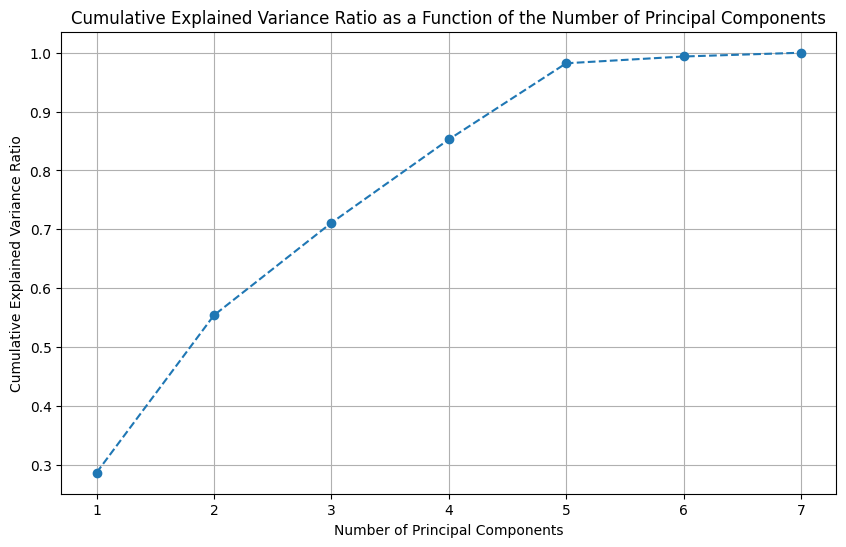

In [120]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio as a Function of the Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [121]:
pca = PCA(n_components=5)

X4_train_scaled_pca = pca.fit_transform(X4_train_scaled)
X4_test_scaled_pca = pca.transform(X4_test_scaled)

In [122]:
lr_pca = LinearRegression()
lr_pca.fit(X4_train_scaled_pca, y4_train)

LinearRegression()

In [123]:
# Predict on the training data
y4_train_pred_pca = lr_pca.predict(X4_train_scaled_pca)
# Predict on the test data
y4_test_pred_pca = lr_pca.predict(X4_test_scaled_pca)

# Calculate RMSE for training data
rmse_train_pca = np.sqrt(mean_squared_error(y4_train, y4_train_pred_pca))
# Calculate RMSE for test data
rmse_test_pca = np.sqrt(mean_squared_error(y4_test, y4_test_pred_pca))

In [124]:
print(f'Linear PCA RMSE for training data: {rmse_train_pca}')
print(f'Linear PCA RMSE for test data: {rmse_test_pca}')

Linear PCA RMSE for training data: 0.8058705407640099
Linear PCA RMSE for test data: 0.8177331496689688


In [125]:
# Define the steps in the pipeline
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('lr', lr_pca)
])

param_grid_pca = {
    'pca__n_components' : [1, 2, 3, 4, 5, 6, 7]
}

grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=kf, scoring='neg_mean_squared_error')

grid_search_pca.fit(X4_train_scaled, y4_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

In [126]:
best_pipeline_pca = grid_search_pca.best_estimator_
optimal_n_components = grid_search_pca.best_params_['pca__n_components']

# Predict on the training set
y4_train_pred_pca_grid = best_pipeline_pca.predict(X4_train_scaled)

# Predict on the test set
y4_test_pred_pca_grid = best_pipeline_pca.predict(X4_test_scaled)

# Calculate RMSE for the training set
mse_train_pca_grid = mean_squared_error(y4_train, y4_train_pred_pca_grid)
rmse_train_pca_grid = np.sqrt(mse_train_pca_grid)

# Calculate RMSE for the test set
mse_test_pca_grid = mean_squared_error(y4_test, y4_test_pred_pca_grid)
rmse_test_pca_grid = np.sqrt(mse_test_pca_grid)

In [127]:
print(f"Optimal number of principal components: {optimal_n_components}")
print(f"Best RMSE on the training set: {rmse_train_pca_grid}")
print(f"Best RMSE on the test set: {rmse_test_pca_grid}")

Optimal number of principal components: 7
Best RMSE on the training set: 0.7189383142730591
Best RMSE on the test set: 0.7249421326410727


#### Answer:
D8 (5)
First, the plot indicates that 5 principal components are sufficient to preserve at least 90% of the variance. The Decision Tree Regression model (D6) has the lowest test RMSE among all models, including those developed with PCA. This indicates that the Decision Tree Regression model captures the underlying patterns in the data more effectively than the linear models with or without PCA. 

Initially, the Linear Regression with PCA using 5 components has a higher test RMSE compared to the Lasso, Ridge, and Decision Tree models. This suggests that reducing the dimensionality to 5 components may lead to some loss of information, affecting the model's predictive performance. When using the optimal 7 components determined by GridSearchCV, the Linear Regression with PCA shows an improved test RMSE, making it comparable to the Lasso and Ridge Regression models but still not as effective as the Decision Tree Regression model.

Overall, the Decision Tree Regression model developed in D6 is the best among the compared models in terms of predictive performance on the test set. The Linear Regression model with PCA using 7 components also performs well and is comparable to Lasso and Ridge Regression models, highlighting the importance of dimensionality reduction techniques in improving model performance. However, capturing complex relationships in the data might require more sophisticated models like Decision Trees or ensemble methods.

## Clustering analysis

### D9:
Consider data3 without any categorical variable. Create the following clustering:
1. Using this data, perform a hierarchical clustering with average linkage and Euclidean dis- tance to cluster the districts. Cut the dendrogram at a height that results in four distinct clusters. Present the mean of the variables for each cluster and briefly summarise the char- acteristics of the districts in the four groups, including the size of each cluster.

2. Using standardised features, perform a hierarchical clustering with average linkage and Euclidean distance to cluster the districts. Cut the dendrogram at a height that results in four distinct clusters. Did the groups change? What effect does scaling the variables have on the hierarchical clustering obtained?

3. Using standardised features, apply the k-means clustering (with k=4) with Euclidean dis- tance. Set the initial centroids of the k-means as the group means obtained from the hierar- chical clustering in part (b). Compare the results with the hierarchical clustering from part 
(b). Which one do you think provides a better result?

4. Perform PCA on the scaled data. Perform hierarchical clustering with average linkage and Euclidean distance on the first two principal component scores. Cut the dendrogram at a height that results in four distinct clusters. Present the scatterplot of the first two principal components using different colours for the instances on each cluster (four colours for four clusters). Compare the group characteristics to the group characteristics obtained in the previous tasks.

5. Perform PCA on the scaled data. Apply the k-means clustering (with k=4) with Euclidean distance on the first two principal components scores, setting the random state to “5508”. Present the scatterplot of the first two principal components using different colours for the instances on each cluster (four colours for four clusters). Discuss the results.

In [128]:
data3_numerical_clusters = data3_numerical_features.copy()

'''
the medianHouseValue is the target variable. Dropping it for clustering allows you to group districts based on features like medianIncome, 
housingMedianAge, totalRooms, etc., to see if there are natural groupings of districts with similar characteristics. After clustering, 
you can then analyze how these clusters relate to medianHouseValue to gain insights into how different factors influence housing prices.

However, as the question did not specify that the target variable has to be dropped, I have chosen to leave it in instead.
'''

# data3_numerical_clusters.drop('medianHouseValue', axis=1).values
# data to be used for clustering part
data3_numerical_clusters

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
0,-122.23,37.88,41,8.3252,4.526,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,5.329513,1.171920,2.123209


In [129]:
# Perform hierarchical clustering
Z = linkage(data3_numerical_clusters, method='average', metric='euclidean')

# Cut the dendrogram to form 4 clusters
num_clusters = 4
clusters = fcluster(Z, num_clusters, criterion='maxclust')

data3_numerical_clusters['cluster'] = clusters

cluster_means = data3_numerical_clusters.groupby('cluster').mean()

cluster_sizes = data3_numerical_clusters['cluster'].value_counts().sort_index()

In [130]:
cluster_means

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
cluster,,,,,,,,
1,-120.605000,37.865000,41.000000,4.890900,2.087500,7.109890,1.225275,551.087912
2,-119.569411,35.631367,28.636364,3.870154,2.068581,5.428809,1.096655,2.946435
3,-121.150000,38.690000,52.000000,6.135900,2.250000,8.275862,1.517241,230.172414
4,-121.980000,38.320000,45.000000,10.226400,1.375000,3.166667,0.833333,1243.333333


In [131]:
cluster_sizes

cluster
1        2
2    20636
3        1
4        1
Name: count, dtype: int64

In [132]:
data3_numerical_clusters_scaled = scaler.fit_transform(data3_numerical_clusters)

# Convert scaled data back to DataFrame
data3_numerical_clusters_scaled = pd.DataFrame(data3_numerical_clusters_scaled, columns=data3_numerical_clusters.columns)

In [133]:
# Perform hierarchical clustering
Z_scaled = linkage(data3_numerical_clusters_scaled, method='average', metric='euclidean')

# Cut the dendrogram to form 4 clusters
num_clusters = 4
clusters_scaled = fcluster(Z, num_clusters, criterion='maxclust')

data3_numerical_clusters_scaled['cluster'] = clusters

cluster_means_scaled = data3_numerical_clusters_scaled.groupby('cluster').mean()

cluster_sizes_scaled = data3_numerical_clusters_scaled['cluster'].value_counts().sort_index()

In [134]:
cluster_means_scaled

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
cluster,,,,,,,,
1,-0.516748,1.045525,0.982143,0.537026,0.016415,0.679391,0.271365,52.766023
2,0.000147,-0.000232,-0.000248,-0.000272,0.000020,-0.000077,-0.000042,-0.011961
3,-0.788774,1.431779,1.856182,1.192367,0.157238,1.150660,0.887459,21.866568
4,-1.203053,1.258550,1.299975,3.345515,-0.601041,-0.914402,-0.555691,119.419103


In [135]:
cluster_sizes_scaled

cluster
1        2
2    20636
3        1
4        1
Name: count, dtype: int64

#### Answer:
D9 (b)
The groups themselves, in terms of the number of districts in each cluster, did not change significantly when the features were standardized. The cluster sizes remained largely the same. Scaling ensures that no single feature dominates the clustering process, leading to clusters that more accurately reflect the combined influence of all features. This results in more balanced and interpretable clusters, as each feature contributes equally to the distance calculations used in clustering. While the groups themselves did not change significantly, scaling had a substantial effect on how the clusters are formed and interpreted. By standardizing the features, we ensure that the clustering reflects a balanced consideration of all features, leading to more meaningful and interpretable clusters. This approach helps prevent biases introduced by features with larger numerical ranges, resulting in clusters that better represent the underlying structure of the data.


In [136]:
# K-means clustering with initial centroids from hierarchical clustering
kmeans = KMeans(n_clusters=num_clusters, init=cluster_means, n_init=1)
kmeans.fit(data3_numerical_clusters_scaled.drop('cluster', axis=1))

KMeans(init=          longitude   latitude  housingMedianAge  medianIncome   
cluster                                                          
1       -120.605000  37.865000         41.000000      4.890900  \
2       -119.569411  35.631367         28.636364      3.870154   
3       -121.150000  38.690000         52.000000      6.135900   
4       -121.980000  38.320000         45.000000     10.226400   

         medianHouseValue  meanRooms  meanBedrooms  meanOcupation  
cluster                                                            
1                2.087500   7.109890      1.225275     551.087912  
2                2.068581   5.428809      1.096655       2.946435  
3                2.250000   8.275862      1.517241     230.172414  
4                1.375000   3.166667      0.833333    1243.333333  ,
       n_clusters=4, n_init=1)

In [137]:
# Add the k-means cluster labels to the DataFrame
data3_numerical_clusters_scaled['kmeans_cluster'] = kmeans.labels_

In [138]:
# Calculate the size of each cluster for k-means
kmeans_cluster_sizes = data3_numerical_clusters_scaled['kmeans_cluster'].value_counts().sort_index()

# Calculate the mean of the variables for each k-means cluster
kmeans_cluster_means = data3_numerical_clusters_scaled.groupby('kmeans_cluster').mean().drop('cluster', axis=1)

In [139]:
kmeans_cluster_means

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
kmeans_cluster,,,,,,,,
0,-1.203053,1.258550,1.299975,3.345515,-0.601041,-0.914402,-0.555691,119.419103
1,0.000083,-0.000207,-0.000100,-0.000130,-0.000075,-0.005118,-0.005853,-0.005782
2,-0.254704,1.483280,0.425936,0.397062,-0.384390,51.373694,69.571713,-0.064574
3,-0.264687,1.534780,0.346478,-1.050477,2.540411,55.163236,51.782487,-0.033063


In [140]:
kmeans_cluster_sizes

kmeans_cluster
0        1
1    20637
2        1
3        1
Name: count, dtype: int64

#### Answer:
D9 (3)

Both methods identify one dominant cluster containing most of the districts. similarly, they both identify small, distinct clusters with only one or two districts. The cluster with the largest size in both methods has means close to zero, indicating a common central grouping of the majority of districts. The differences are that the exact values of the cluster means differ slightly, reflecting how each method optimizes the grouping of districts. K-means clustering adjusted the initial centroids obtained from hierarchical clustering, resulting in slightly different means for some clusters.

in terms of better result, Hierarchical Clustering may provide a more intuitive and hierarchical understanding of the data structure, especially if the data naturally forms nested clusters. K-Means Clustering offers a more flexible and computationally efficient clustering solution, with the ability to fine-tune initial centroids for better within-cluster variance minimization. 

K-means clustering with initial centroids from hierarchical clustering might provide a slightly better clustering solution by optimizing the centroid positions to minimize variance, especially if computational efficiency and compact clusters are prioritized.

In [141]:
# Perform PCA

data3_numerical_clusters_scaled_pca = data3_numerical_clusters_scaled.copy()

# Drop the cluster columns if they exist
data3_numerical_clusters_scaled_pca = data3_numerical_clusters_scaled_pca.drop(columns=['cluster', 'kmeans_cluster'])

data3_numerical_clusters_scaled_pca

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
0,-1.327835,1.052548,0.982143,2.344766,2.129631,0.628559,-0.153758,-0.049597
1,-1.322844,1.043185,-0.607019,2.332238,1.314156,0.327041,-0.263336,-0.092512
2,-1.332827,1.038503,1.856182,1.782699,1.258693,1.155620,-0.049016,-0.025843
3,-1.337818,1.038503,1.856182,0.932968,1.165100,0.156966,-0.049833,-0.050329
4,-1.337818,1.038503,1.856182,-0.012881,1.172900,0.344711,-0.032906,-0.085616
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-1.216128,-1.115804,-0.155023,0.077354,-0.049110
20636,-0.818722,1.806329,-0.845393,-0.691593,-1.124470,0.276881,0.462365,0.005021
20637,-0.823713,1.778237,-0.924851,-1.142593,-0.992746,-0.090318,0.049414,-0.071735
20638,-0.873626,1.778237,-0.845393,-1.054583,-1.058608,-0.040211,0.158778,-0.091225


In [142]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(data3_numerical_clusters_scaled_pca)
pca_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])

In [143]:
Z = linkage(pca_df, method='average', metric='euclidean')
pca_clusters = fcluster(Z, num_clusters, criterion='maxclust')
pca_df['cluster'] = pca_clusters

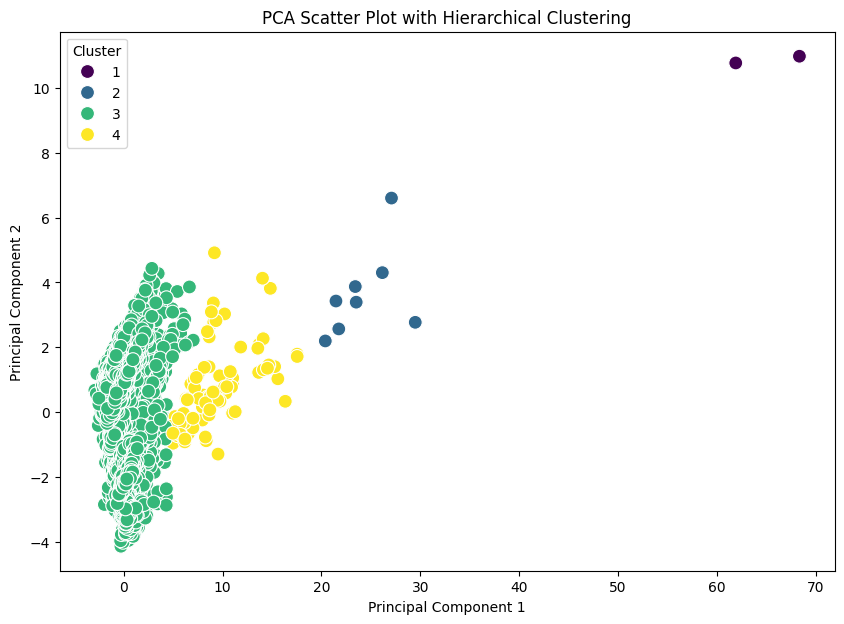

In [144]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100)
plt.title('PCA Scatter Plot with Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [145]:
data3_numerical_clusters_scaled_pca['pca_cluster'] = pca_clusters
cluster_means_pca = data3_numerical_clusters_scaled_pca.groupby('pca_cluster').mean()

cluster_pca_sizes = data3_numerical_clusters_scaled_pca['pca_cluster'].value_counts().sort_index()

In [146]:
cluster_means_pca

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
pca_cluster,,,,,,,,
1,-0.259695,1.509030,0.386207,-0.326708,1.078011,53.268465,60.677100,-0.048818
2,0.124011,1.143259,-0.815596,-0.410856,-0.283972,20.251632,22.031049,-0.092031
3,0.000513,-0.005202,0.003937,0.000552,0.001606,-0.042876,-0.046052,0.000243
4,-0.135960,1.169537,-0.927794,-0.091482,-0.405873,7.561783,8.008882,-0.051474


In [147]:
cluster_pca_sizes

pca_cluster
1        2
2        8
3    20549
4       81
Name: count, dtype: int64

#### Answer:
D9 (d)

* Hierarchical Clustering: Provided clear and extreme distinctions between clusters, but resulted in highly uneven cluster sizes.

* K-Means Clustering: Adjusted centroids from hierarchical clustering, resulting in clusters with slightly different characteristics but still dominated by one large cluster.

* PCA + Hierarchical Clustering: Provided more balanced cluster sizes and captured the central tendency of the data more effectively, with clusters reflecting the most significant variance.

The PCA-based clustering method provides a better understanding of the data's overall structure, while hierarchical clustering may highlight more extreme and distinct groupings. K-means clustering adjusts the centroids to optimize within-cluster variance but does not significantly change the overall structure from hierarchical clustering. Depending on the goal of the analysis, PCA-based clustering can offer more balanced insights, while hierarchical clustering can highlight distinct outliers or specific patterns. 

In [148]:
data3_numerical_clusters_scaled_pca_k = data3_numerical_clusters_scaled_pca.copy()

# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(data3_numerical_clusters_scaled_pca_k)
pca_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])

In [149]:
# Apply K-Means Clustering on the PCA scores
kmeans = KMeans(n_clusters=4, random_state=5508)
kmeans.fit(pca_df)
pca_df['kmeans_cluster'] = kmeans.labels_

# Calculate the mean of the original variables for each k-means cluster
data3_numerical_clusters_scaled_pca_k['kmeans_cluster'] = kmeans.labels_
cluster_means_kmeans = data3_numerical_clusters_scaled_pca_k.groupby('kmeans_cluster').mean()
cluster_pca_k_sizes = data3_numerical_clusters_scaled_pca_k['pca_cluster'].value_counts().sort_index()

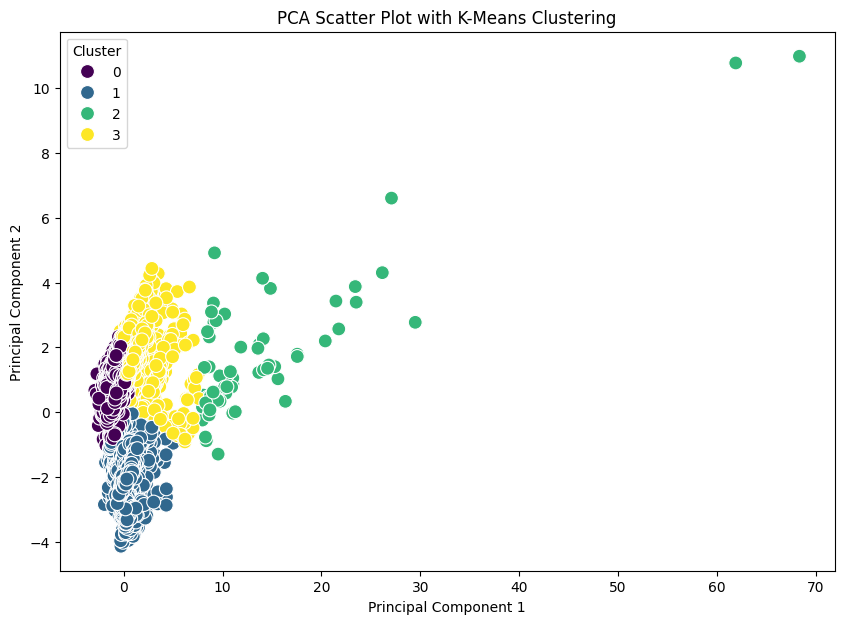

In [150]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', s=100)
plt.title('PCA Scatter Plot with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Answer:
D9 (e)

Based on the results and comparing to the previous steps, PCA + K-Means provides a balanced approach to clustering by reducing dimensionality and then applying clustering on the most significant components. This method highlights the central tendency of the data while also identifying distinct smaller clusters. Hierarchical Clustering and K-Means with Initial Centroids produce similar results, with one dominant cluster and a few smaller clusters, reflecting extreme values for certain features.

The PCA + K-Means approach is advantageous because it leverages the principal components to focus on the most critical variance in the data, leading to more meaningful and interpretable clusters. This method effectively balances the central tendency with distinct smaller clusters, providing a comprehensive view of the data's structure.

In [151]:
cluster_means_kmeans

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation,pca_cluster
kmeans_cluster,,,,,,,,,
0,0.795115,-0.804400,0.088663,-0.321081,-0.230756,-0.281687,-0.084918,0.003989,3.000000
1,-1.043178,1.074338,0.037481,-0.196933,-0.223567,-0.031307,-0.039512,-0.001642,3.000119
2,-0.009148,1.055618,-0.884471,-0.128730,-0.344895,11.966737,13.057083,-0.071813,3.639344
3,0.467491,-0.548175,-0.364593,1.562030,1.359778,0.721499,0.107876,-0.006332,3.009794


In [152]:
cluster_pca_k_sizes

pca_cluster
1        2
2        8
3    20549
4       81
Name: count, dtype: int64

### D10:
Consider data3 without any categorical variable. Compute the silhouette score by applying k- means on this dataset after scaling the features to have zero mean and unit standard deviation. Use values for k in range(2,20,1). Remember to set random state=5508 for the KMeans class.

1. Plot the silhouette scores for the different k values. According to this score, what was the optimal value of clustering?

2. Considering the optimal k value obtained in the previous item, plot the k groups (using different colours for the instances in each group) on the first two principal component scores of the same data. In a side plot, plot the first principal component scores in which the instance colours represent the values of the categorical value you discarded for this part of the assignment. Comment on the relationship between the groups in these two plots.

3. With clustering analysis and your findings from EDA, what are your conclusions about the 2 marks data that may be impacting your models?

In [153]:
data3_numerical_sillhoutte = scaler.fit_transform(data3_numerical_features)

In [155]:
# Compute silhouette scores for k in range(2, 20)
silhouette_scores = []
k_values = range(2, 20, 1)

In [156]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5508)
    kmeans.fit(data3_numerical_sillhoutte)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data3_numerical_sillhoutte, labels))

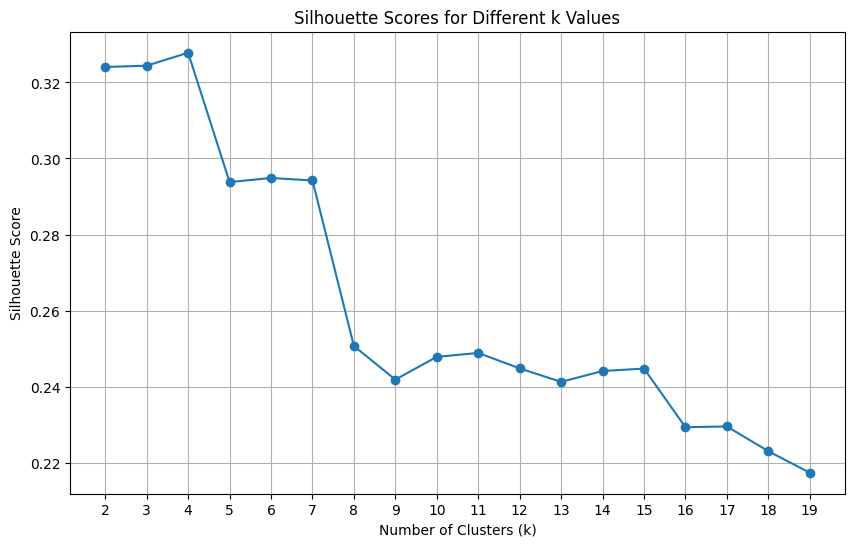

In [157]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [158]:
# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal k achieved:", optimal_k)

Optimal k achieved: 4


In [159]:
# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(data3_numerical_sillhoutte)
pca_df = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])

# Apply K-Means Clustering with the optimal k value obtained earlier
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=5508)
kmeans.fit(pca_df)
pca_df['kmeans_cluster'] = kmeans.labels_

/var/folders/bv/7fx1hjkj4sl_qstwn5255wnr0000gn/T/ipykernel_12010/4044473923.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_df['PC1'], [0]*len(pca_df), c=pca_df['categorical'].map(color_mapping), cmap='viridis')


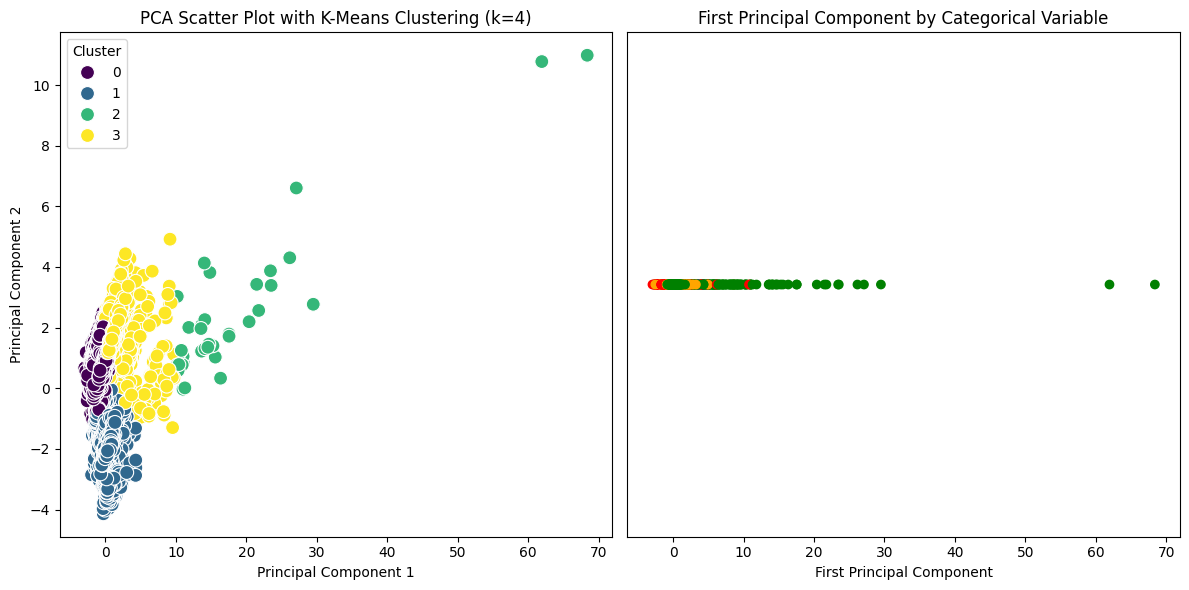

In [166]:
# Plot the k groups on the first two principal component scores
plt.figure(figsize=(12, 6))

# Plot for k-means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', s=100)
plt.title(f'PCA Scatter Plot with K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

# Define color mapping for the categorical variable
color_mapping = {'NEAR BAY': 'blue', 'INLAND': 'green', 'NEAR OCEAN': 'red', 'ISLAND': 'purple', '<1H OCEAN': 'orange'}

# Plot first principal component colored by the discarded categorical variable
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], [0]*len(pca_df), c=pca_df['categorical'].map(color_mapping), cmap='viridis')
plt.xlabel('First Principal Component')
plt.title('First Principal Component by Categorical Variable')
plt.yticks([])  # Remove y-axis ticks for clarity

plt.tight_layout()
plt.show()

# # Plot for categorical values
# pca_df['categorical'] = df['oceanProximity']
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='categorical', palette='viridis', s=100)
# plt.title('PCA Scatter Plot with Categorical Values')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Category')

# plt.tight_layout()
# plt.show()


#### Answer:
D10 (b)

1. Cluster Separation vs. Categorical Separation:
    The clusters in the left plot are well-separated in the 2D PCA space, indicating that the K-Means algorithm captured significant underlying patterns in the data that differentiate the clusters. However, the right plot shows that the first principal component alone does not provide a clear separation based on the oceanProximity categories.
    This suggests that while the clusters are well-defined in the PCA-reduced space, the principal component that explains the most variance in the data does not necessarily correspond to the oceanProximity variable.

2. Variance Explanation:
    The first two principal components explain a significant portion of the variance in the data, allowing for clear clustering as seen in the left plot. However, the variance captured by the first principal component alone is not enough to clearly separate the instances based on oceanProximity.

3. Insights:
    The results indicate that oceanProximity may not be the primary factor driving the largest variance in the dataset, as captured by the first principal component. Other features likely contribute more significantly to the variance and thus to the clustering observed in the left plot.

The dual-plot analysis shows that the clustering based on the first two principal components captures distinct groups of districts, but these groups do not align perfectly with the oceanProximity categories. This highlights the importance of considering multiple components and features for a comprehensive understanding of the data's structure and the factors influencing the clusters.

#### Answer:
D10 (c)

The significant geographic variability and differences in housing characteristics imply that models need to account for these factors to improve predictions. Including geographic coordinates and derived features like mean rooms and mean bedrooms helped capture this variability. Clusters based on geographic proximity and housing characteristics indicate that regional factors play a critical role in housing prices, which models need to capture effectively. 

As for the models performances: 

* Lasso and Ridge Regression: These models benefited from feature selection and regularization, helping manage multicollinearity and overfitting. However, they might miss capturing complex non-linear relationships.

* Decision Tree Regression: This model captured non-linear relationships better, resulting in lower RMSE values. However, it is more prone to overfitting without proper tuning.

* PCA and Clustering: PCA helped reduce dimensionality and revealed the most significant variance in the data, aiding in more meaningful clustering and model interpretation. The clustering analysis provided insights into the inherent groupings in the data, which could be used to refine model features and improve performance.